In [1]:
import cv2
import glob
import os
import math
import matplotlib.pyplot as plt
import numpy as np

SIZE = 128

In [2]:
data_img = []
data_label = [] 
for dir_path in glob.glob("Dataset/*"):
    label = dir_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (SIZE, SIZE))
        data_img.append(img)
        data_label.append(label)
        
data_img = np.array(data_img)
data_label = np.array(data_label)

NonDemented
MildDemented
VeryMildDemented


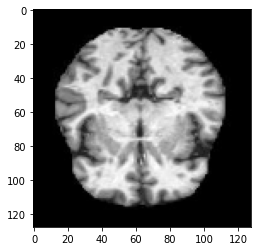

In [3]:
plt.imshow(data_img[0], cmap='gray')

In [4]:
def image_negatif(pixels):
    result = []
    for row in pixels:
        current = []
        for pixel in row:
            negatif = 255 - pixel
            current.append(negatif)
        result.append(current)
    return np.array(result)

# Mengurangi noise dengan median filtering
def median_filter(data, kernel_size):
    temp = []
    indexer = kernel_size // 2
    data_final = []
    data_final = np.zeros((len(data), len(data[0])))
    for i in range(len(data)):
        
        for j in range(len(data[0])):
            
            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(data[i + z - indexer][j + k - indexer])
                            
            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

def logarithmic_trans(c, gamma, pixels):
    result = []
    for row in pixels:
        current = []
        for pixel in row:
            rule = math.floor(c * ((pixel) ** gamma))
            current.append(rule)
        result.append(current)
    return np.array(result)

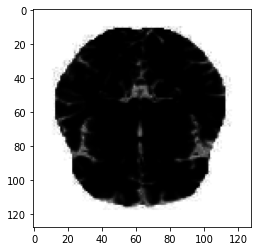

In [5]:
img_negatif = image_negatif(data_img[0])
filtered_img = median_filter(img_negatif, 12)
log_img = logarithmic_trans(1.33, 7, img_negatif)
plt.imshow(log_img, cmap='gray')

In [6]:
def image_preprocessing(dataset):
    new_dataset = []
    for image in dataset:
        img_negatif = image_negatif(image)
        filtered_img = median_filter(img_negatif, 12)
        log_img = logarithmic_trans(1.33, 7, img_negatif)
        new_dataset.append(log_img)
    return np.array(new_dataset)

In [7]:
def feature_extractor(dataset):
    new_dataset = []
    for image in dataset:
        image_flatten = image.flatten()
        new_dataset.append(image_flatten)
    new_dataset = np.array(new_dataset)
    # normalisasi
    new_dataset = new_dataset / 255.0
    return new_dataset

In [8]:
preprocess_img = image_preprocessing(data_img)
feature_img = feature_extractor(preprocess_img)

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()
le.fit(data_label)
data_encoded = le.transform(data_label)

x_train, x_test, y_train, y_test = train_test_split(feature_img, data_encoded, train_size=0.8)

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4096,1024,256),max_iter=500)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(4096, 1024, 256), max_iter=500)

In [11]:
predictions = mlp.predict(x_test)

In [12]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, predictions))

Accuracy =  0.5666666666666667


<AxesSubplot:>

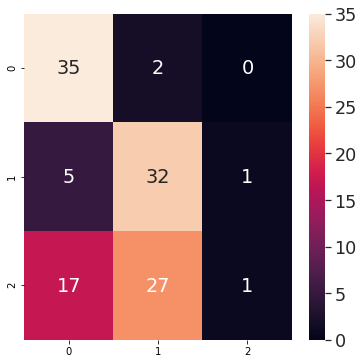

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)